In [52]:
import cv2
import numpy as np
import matplotlib as plt

In [53]:

img = cv2.imread('sample.jpg',0)
img2 = img.copy()
template = cv2.imread('bucket_marker_sample.png',0)
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
           'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

meth = methods[5]

img = img2.copy()
method = eval(meth)

# Apply template Matching
res = cv2.matchTemplate(img,template,method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

# If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
else:
    top_left = max_loc

bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(img,top_left, bottom_right, 255, 2)

cv2.imwrite("Jani.jpg", img)
cv2.imwrite("res.jpg", res)

    

AttributeError: 'NoneType' object has no attribute 'shape'

In [5]:
res

array([[ 0.81493473,  0.81628805,  0.81761545, ...,  1.        ,
         1.        ,  1.        ],
       [ 0.81497532,  0.81632024,  0.81768668, ...,  1.        ,
         1.        ,  1.        ],
       [ 0.81488085,  0.81624484,  0.81766063, ...,  1.        ,
         1.        ,  1.        ],
       ..., 
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ]], dtype=float32)

In [73]:
# python tutorial
import cv2
import numpy as np

img_rgb = cv2.imread('sample.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

template = cv2.imread('empty_template.jpg')
w, h, _ = template.shape





In [74]:
resR = cv2.matchTemplate(img_rgb[:,:,0],template[:,:,0],cv2.TM_CCOEFF_NORMED)
resG = cv2.matchTemplate(img_rgb[:,:,1],template[:,:,1],cv2.TM_CCOEFF_NORMED)
resB = cv2.matchTemplate(img_rgb[:,:,2],template[:,:,2],cv2.TM_CCOEFF_NORMED)

resRGB = resR + resG + resB

threshold = 2.3
loc = np.where( resRGB >= threshold)



In [78]:
print len(loc[0])

2586


In [81]:
print min(loc[1])
print max(loc[1])

666
1487


In [70]:
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

cv2.imwrite("res.jpg", img_rgb)

True

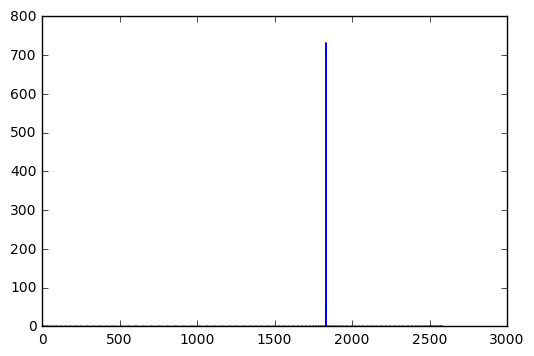

In [89]:
import matplotlib.pyplot as plt
plt.plot(np.diff(np.sort(loc[1])))
plt.show()